In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = "/content/drive/MyDrive/capstone_data/2022-12-01-2023-07-01(109┴÷┴í).xls.xlsx"

In [2]:
data = pd.read_excel(data_path, usecols=["ou", "NH3",	"H2S",	"TVOCs", "temperature",	"humidity"])

In [71]:
data.drop(data[data["ou"]>15].index, inplace=True)
data.drop(data[data["TVOCs"]>0.11].index, inplace=True)
data.drop(data[data["NH3"]<0.3].index, inplace=True)


In [3]:
X = data.iloc[100:, 1:].values
y = data.iloc[100:, :1].values

x_test = data.iloc[:100, 1:].values
y_test = data.iloc[:100, :1].values

# Linear

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, y)

LinearRegression()

In [ ]:
reg.coef_

array([[  5.88287997, -12.45883565,  23.9500831 ,   0.06184134,
          0.34476317]])

In [ ]:
prediction_linear = reg.predict(x_test)
error_linear = np.subtract(prediction_linear, y_test)
# MSE = 1/n * Σ(yi - ŷi)^2
cost_linear = np.sum(np.square(error_linear)) / x_test.shape[0]

In [ ]:
error_linear

In [ ]:
cost_linear

2.1642960830160907

# Non-linear


##Trees

In [ ]:
from sklearn import tree
# decision tree, max_depth=no limit
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

In [ ]:
prediction_tree = clf.predict(x_test)
error = np.subtract(prediction_tree, y_test)
# MSE = 1/n * Σ(yi - ŷi)^2
cost_tree = np.sum(np.square(error)) / x_test.shape[0]

In [ ]:
cost_tree

167.4208

In [58]:
# decision tree, max_depth = 10000

clf_2 = tree.DecisionTreeRegressor(max_depth=10000)
clf_2 = clf_2.fit(X, y)

In [59]:
prediction_tree_2 = clf_2.predict(x_test)
error_2 = np.subtract(prediction_tree_2, y_test)
# MSE = 1/n * Σ(yi - ŷi)^2
cost_tree_2 = np.sum(np.square(error_2)) / x_test.shape[0]

In [60]:
cost_tree_2

182.636

In [63]:
clf_3 = tree.DecisionTreeRegressor(max_depth=1000)
clf_3 = clf_3.fit(X, y)

In [64]:
prediction_tree_3 = clf_3.predict(x_test)
error_3 = np.subtract(prediction_tree_3, y_test)
# MSE = 1/n * Σ(yi - ŷi)^2
cost_tree_3 = np.sum(np.square(error_3)) / x_test.shape[0]

In [65]:
cost_tree_3

146.36880000000002

In [66]:
clf_4 = tree.DecisionTreeRegressor(max_depth=100)
clf_4 = clf_4.fit(X, y)
prediction_tree_4 = clf_4.predict(x_test)
error_4 = np.subtract(prediction_tree_4, y_test)
# MSE = 1/n * Σ(yi - ŷi)^2
cost_tree_4 = np.sum(np.square(error_4)) / x_test.shape[0]

In [67]:
cost_tree_4

176.09440000000004

#Neural network

In [5]:
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.0


In [4]:
X_2 = data.iloc[100:, 1:]
y_2 = data.iloc[100:, :1]

In [6]:
model = keras.Sequential([
      layers.Input(shape=(5,1)),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))

In [7]:
%%time
history = model.fit(
    X_2,
    y_2,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 11min 25s, sys: 56.7 s, total: 12min 22s
Wall time: 10min 22s


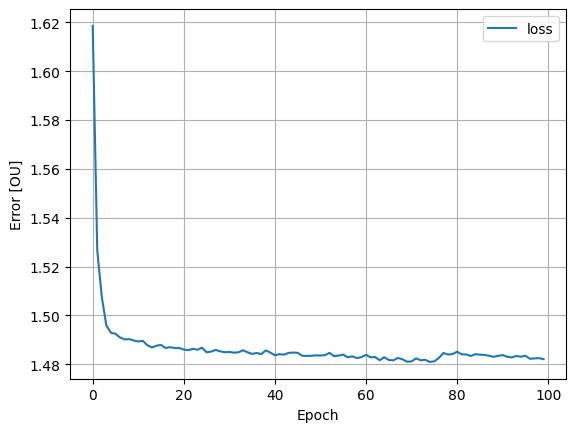

In [11]:
plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
# plt.ylim([0, 3])
plt.xlabel('Epoch')
plt.ylabel('Error [OU]')
plt.legend()
plt.grid(True)

In [ ]:
history.history["loss"]

In [19]:
x_test_2 = data.iloc[:100, 1:]
y_test_2 = data.iloc[:100, :1]

In [20]:
prediction_nn = model.evaluate(x_test_2, y_test_2)
print("test loss, test acc:", prediction_nn)

4/4 [==============================] - 0s 4ms/step - loss: 1.8795
test loss, test acc: 1.8795173168182373


In [21]:
prediction_nn

1.8795173168182373